In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import datetime

In [2]:
# read dataFrame
df1 = pd.read_csv('Data/cleanData/BarangHistory.csv')
df2 = pd.read_csv('Data/cleanData/ItemPenjualan.csv')
df3 = pd.read_csv('Data/cleanData/ItemPembelian.csv')
df4 = pd.read_csv('Data/cleanData/pembelian.csv') 
df5 = pd.read_csv('Data/cleanData/penjualan.csv')

C:\Users\HP\AppData\Local\Temp\ipykernel_32340\2442242761.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('Data/cleanData/BarangHistory.csv')
C:\Users\HP\AppData\Local\Temp\ipykernel_32340\2442242761.py:6: DtypeWarning: Columns (3,4,7,20,41,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df5 = pd.read_csv('Data/cleanData/penjualan.csv')


In [3]:
df1.head()

,kode,nama,kategori,golongan,toko,gudang,hpp,harga_toko,kode_barcode,supplier,date
0,00000879,Socolatte Choc.Original Drink 450g,Minuman Bubuk,Bubuk,4,0,42000.00,46500,00000879,SC,2022-05-05
1,749921011121,NutriSari 10x14gr MaduJeruk,Minuman Bubuk,Bubuk,3,0,10230.00,11500,749921011121,MBS,2022-02-10
2,8993365121539,Madu TJ 150g Super,Madu,NaN,12,0,18000.00,20700,8993365121539,HERI,2022-12-06
3,00002015,Luxury Regulator GRL-2D,Gas,Regulator,0,0,35000.00,42500,00002015,SP,2022-06-01
4,8853301550017,Whiskas 85gr 1+ Tuna,Pet Stuff,NaN,21,0,6004.17,6700,8853301550017,RAHMAT,2022-06-02


In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77167 entries, 0 to 77166
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   kode          77167 non-null  object 
 1   nama          77167 non-null  object 
 2   kategori      77155 non-null  object 
 3   golongan      48224 non-null  object 
 4   toko          77167 non-null  int64  
 5   gudang        77167 non-null  int64  
 6   hpp           77167 non-null  float64
 7   harga_toko    77167 non-null  int64  
 8   kode_barcode  77167 non-null  object 
 9   supplier      76568 non-null  object 
 10  date          77167 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 6.5+ MB
None


In [5]:
df1['date'] = pd.to_datetime(df1['date'])
df1['Total'] = df1['toko'] + df1['gudang']

In [6]:
use_data = ['date','kategori','nama','Total']

In [7]:
df1 = df1[use_data]

In [8]:
df1.head()

,date,kategori,nama,Total
0,2022-05-05,Minuman Bubuk,Socolatte Choc.Original Drink 450g,4
1,2022-02-10,Minuman Bubuk,NutriSari 10x14gr MaduJeruk,3
2,2022-12-06,Madu,Madu TJ 150g Super,12
3,2022-06-01,Gas,Luxury Regulator GRL-2D,0
4,2022-06-02,Pet Stuff,Whiskas 85gr 1+ Tuna,21


In [9]:
# make predict
df1['date'] = pd.to_datetime(df1['date']) 
df1['date'] = df1['date'].dt.strftime('%m') 
df1.head()

,date,kategori,nama,Total
0,05,Minuman Bubuk,Socolatte Choc.Original Drink 450g,4
1,10,Minuman Bubuk,NutriSari 10x14gr MaduJeruk,3
2,06,Madu,Madu TJ 150g Super,12
3,01,Gas,Luxury Regulator GRL-2D,0
4,02,Pet Stuff,Whiskas 85gr 1+ Tuna,21


In [10]:
# make groub by date by month
df1Supplier =  pd.DataFrame(df1.groupby(['date','kategori']).sum())

df1Supplier.head(1000)

C:\Users\HP\AppData\Local\Temp\ipykernel_32340\3047989489.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1Supplier =  pd.DataFrame(df1.groupby(['date','kategori']).sum())


Total
date kategori       
01   ATK        3252
     Beras        13
     Biskuit    2423
     Eskrim      214
     Gas          29
...              ...
31   Selai         3
     Semir        11
     Sereal       47
     Susu        526
     Tissue      799

[992 rows x 1 columns]

In [11]:
bestCategory = df1['kategori'].value_counts()
bestCategory

ATK               17702
Mainan             7582
Sabun              7170
Minuman            5784
Susu               5463
Obat               5241
Biskuit            4934
Kerupuk            3425
Permen             2678
Tissue             2472
Popok              2211
Mie                1931
Rokok              1224
Roti                962
Eskrim              887
Minuman Bubuk       813
Otomotif            697
Nugget              677
Pet Stuff           656
Minyak              580
Kacang              573
Madu                538
Jelly               497
Gas                 421
Kueh                386
Sereal              379
Selai               285
Beras               242
Kurma               218
Pemanis             208
Makanan Kaleng      169
Semir               150
Name: kategori, dtype: int64

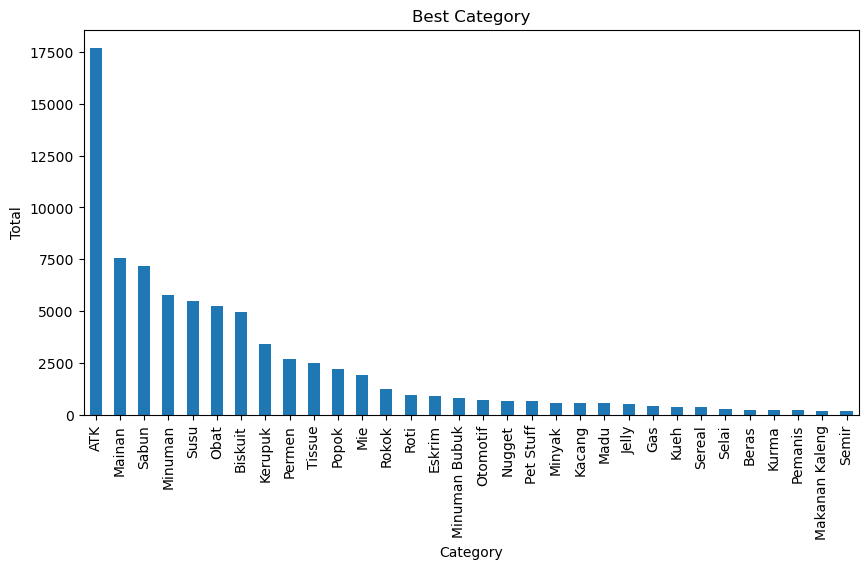

In [12]:
# make visualization for best category
plt.figure(figsize=(10,5)) 
plt.title('Best Category')
plt.xlabel('Category')
plt.ylabel('Total')
bestCategory.plot(kind='bar')
plt.show()

In [13]:
# make groub by date by month
df1Supplier =  pd.DataFrame(df1.groupby(['date','kategori']).sum())

df1Supplier.head(1000)

C:\Users\HP\AppData\Local\Temp\ipykernel_32340\3047989489.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1Supplier =  pd.DataFrame(df1.groupby(['date','kategori']).sum())


Total
date kategori       
01   ATK        3252
     Beras        13
     Biskuit    2423
     Eskrim      214
     Gas          29
...              ...
31   Selai         3
     Semir        11
     Sereal       47
     Susu        526
     Tissue      799

[992 rows x 1 columns]

In [14]:
input = df1.drop(['Total'], axis=1)
target = df1['Total']

In [15]:
target

0         4
1         3
2        12
3         0
4        21
         ..
77162     4
77163    28
77164    12
77165    11
77166    30
Name: Total, Length: 77167, dtype: int64

In [16]:
input

,date,kategori,nama
0,05,Minuman Bubuk,Socolatte Choc.Original Drink 450g
1,10,Minuman Bubuk,NutriSari 10x14gr MaduJeruk
2,06,Madu,Madu TJ 150g Super
3,01,Gas,Luxury Regulator GRL-2D
4,02,Pet Stuff,Whiskas 85gr 1+ Tuna
...,...,...,...
77162,08,Minuman,Fruit Tea 318ml Klg. BlackC.
77163,06,Minuman,Zee UHT 200ml Choc.
77164,01,Minuman,DiamondMilk UHT 1L LowFat Plain
77165,09,Minuman,FresTea 350ml Original


In [17]:
# LaberEncoder
from sklearn.preprocessing import LabelEncoder

# create instance
le_nama = LabelEncoder()
le_kategori = LabelEncoder()
le_date = LabelEncoder()
# le_Total = LabelEncoder()

In [18]:
input['nama_n'] = le_nama.fit_transform(input['nama'])
input['kategori_n'] = le_kategori.fit_transform(input['kategori'])
input['date_n'] = le_date.fit_transform(input['date'])

input.head(3)

,date,kategori,nama,nama_n,kategori_n,date_n
0,05,Minuman Bubuk,Socolatte Choc.Original Drink 450g,9048,15,4
1,10,Minuman Bubuk,NutriSari 10x14gr MaduJeruk,7297,15,9
2,06,Madu,Madu TJ 150g Super,6243,10,5


In [19]:
input_n = input.drop(['nama','kategori','date'], axis=1)
input_n.head()

,nama_n,kategori_n,date_n
0,9048,15,4
1,7297,15,9
2,6243,10,5
3,6126,4,0
4,10126,22,1


In [20]:
# # combine input and target
# df1_n = pd.concat([input_n, target], axis=1)
# df1_n.head()

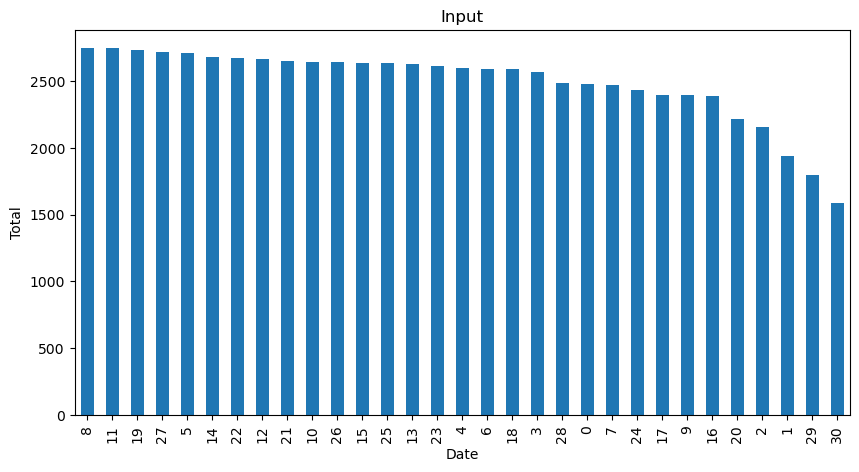

In [21]:
# make visualization input_n use barcart
plt.figure(figsize=(10,5))
plt.title('Input')
plt.xlabel('Date')
plt.ylabel('Total')
input_n['date_n'].value_counts().plot(kind='bar')
plt.show()


In [25]:
# training with TensorFlow linear regression
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# make model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[3]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

In [23]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers

# # Create the model
# model = keras.Sequential()

# # Add layers to the model
# model.add(layers.Dense(64, activation='relu', input_shape=[3]))  # Dense layer
# # model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))  # Convolutional layer
# model.add(layers.MaxPooling2D(pool_size=(2, 2)))  # Max pooling layer
# model.add(layers.Flatten())  # Flatten layer
# model.add(layers.Dense(10, activation='softmax'))  # Output layer

# # Print model summary
# model.summary()


In [26]:
# compile model
model.compile(loss='mse',
                optimizer=tf.keras.optimizers.RMSprop(0.001),
                metrics=["accuracy"])

In [27]:
# training model
history = model.fit(input_n, target, epochs=10)

Epoch 1/10
2412/2412 [==============================] - 2s 794us/step - loss: 4476.8857 - accuracy: 0.2704
Epoch 2/10
2412/2412 [==============================] - 2s 821us/step - loss: 1983.9573 - accuracy: 0.1633
Epoch 3/10
2412/2412 [==============================] - 2s 803us/step - loss: 1823.5337 - accuracy: 0.0689
Epoch 4/10
2412/2412 [==============================] - 2s 815us/step - loss: 1795.9567 - accuracy: 0.0679
Epoch 5/10
2412/2412 [==============================] - 2s 825us/step - loss: 1794.6464 - accuracy: 0.0665
Epoch 6/10
2412/2412 [==============================] - 2s 822us/step - loss: 1794.7509 - accuracy: 0.0640
Epoch 7/10
2412/2412 [==============================] - 2s 790us/step - loss: 1793.3154 - accuracy: 0.0655
Epoch 8/10
2412/2412 [==============================] - 2s 932us/step - loss: 1791.1219 - accuracy: 0.0637
Epoch 9/10
2412/2412 [==============================] - 3s 1ms/step - loss: 1790.0033 - accuracy: 0.0649
Epoch 10/10
2412/2412 [================

In [28]:
# make predict
predict = model.predict(input_n)

predict

2412/2412 [==============================] - 2s 728us/step


array([[4.277061 ],
       [4.207292 ],
       [3.8634417],
       ...,
       [3.337561 ],
       [3.7231767],
       [3.7679014]], dtype=float32)